##### Import libraries 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

##### Import Amazon reviews dataset

In [2]:
amzn_df = pd.read_csv('amazon_reviews.csv')


##### Exploratory Data Analysis

In [3]:
#take a look at the data 
amzn_df.head(3)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1


In [4]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
#no missing values
amzn_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

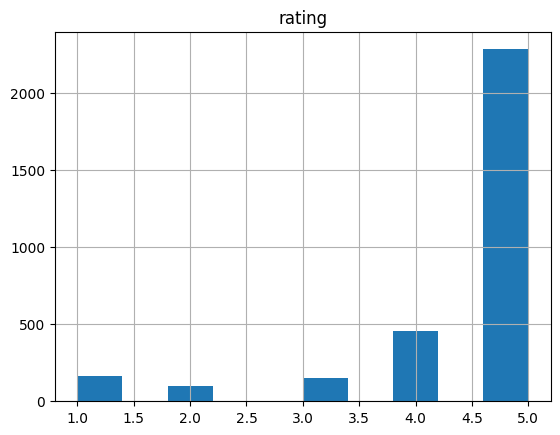

In [9]:
amzn_df.hist(column='rating',bins=10)
#a lot of 5 star ratings 

array([[<AxesSubplot:title={'center':'feedback'}>]], dtype=object)

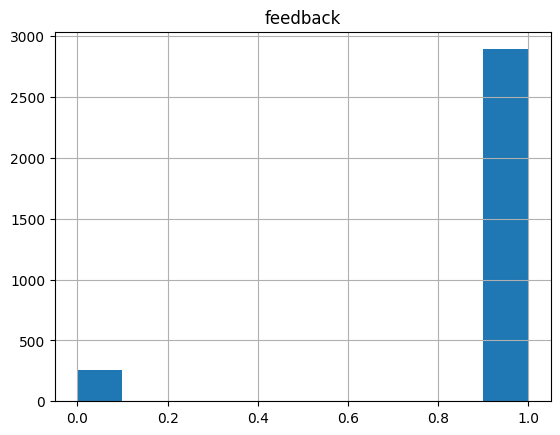

In [11]:
#a lot more positive feedback than negative 
amzn_df.hist(column ='feedback')

In [12]:
#search for correlations 
plt.boxplot()

TypeError: boxplot() missing 1 required positional argument: 'x'